# Data Exploration

In this notebooks we will look into the data exploration techniques in accordance to the theory as explained in the README file. 
In this notebook we will use the titanic dataset as available in kaggle. This dataset is used to predict the survival of a passanger

In [33]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import chi2_contingency

%matplotlib inline

### Read the Data

In this dataset we will try to predict the 

In [3]:
# Do something
df1 = pd.read_csv("data/titanic/train.csv")
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Identification

##### Identify the column data types

In [4]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Unique value count plot

In [8]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

##### Frequency count

In [14]:
df1['Survived'].value_counts(normalize=False) # If true it will normalize to realtive frequencies

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

##### Variance

In [19]:
df1['Survived'].var()

0.23677221654749742

### Univariate Analysis

##### Pareto Chart 

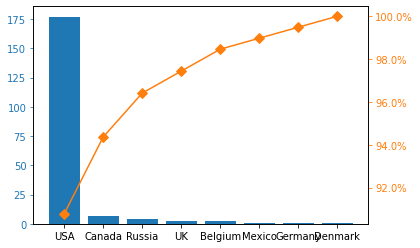

In [69]:
df = pd.DataFrame({'country': [177.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0]})
df.index = ['USA', 'Canada', 'Russia', 'UK', 'Belgium', 'Mexico', 'Germany', 'Denmark']
df = df.sort_values(by='country',ascending=False)
df["cumpercentage"] = df["country"].cumsum()/df["country"].sum()*100


fig, ax = plt.subplots()
ax.bar(df.index, df["country"], color="C0")
ax2 = ax.twinx()
ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

##### Histogram

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

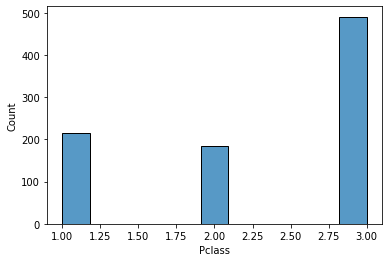

In [70]:
sns.histplot(df1['Pclass'], stat='count')

##### Central Tendency

In [71]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Spead of distribution
BOX PLOT

<AxesSubplot:xlabel='Age'>

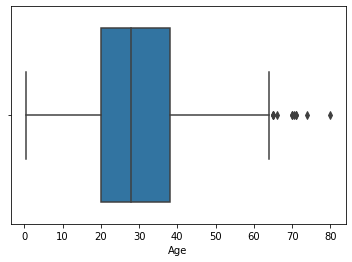

In [75]:
# find the spead of age
sns.boxplot(x=df1['Age'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

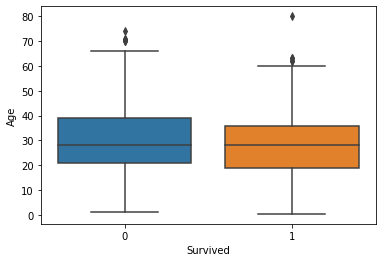

In [77]:
# With y = Survived

sns.boxplot(y=df1['Age'], x=df1['Survived'])

DENSITY CURVE

<AxesSubplot:xlabel='Age', ylabel='Density'>

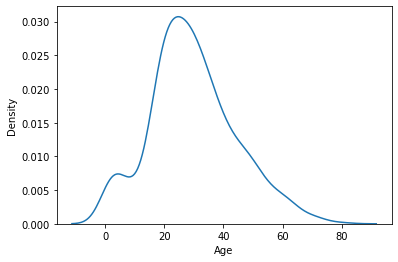

In [81]:
sns.kdeplot(data=df1,x='Age')

### Bivariate analysis

##### Correlation between continuous variables 

<AxesSubplot:>

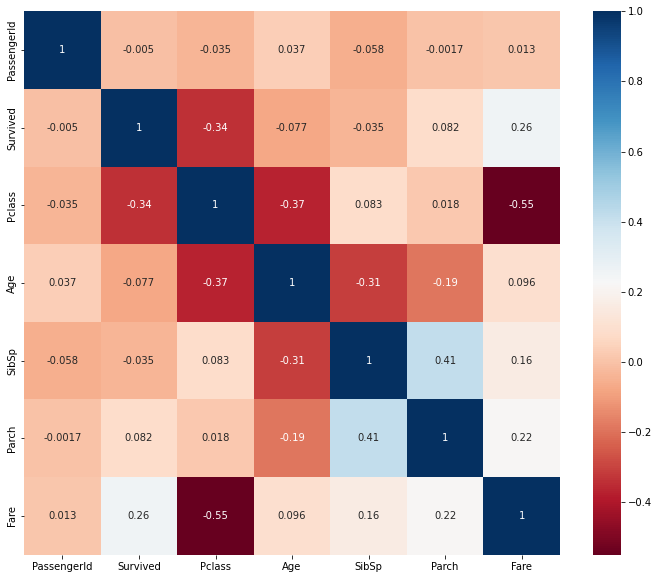

In [49]:
fig, ax = plt.subplots(figsize=(12,10))
corr_val = df1.corr()
sns.heatmap(corr_val, xticklabels=corr_val.columns, yticklabels=corr_val.columns, annot=True, cmap='RdBu')

In [12]:
corr_val['Pclass']['Fare']

-0.5494996199439076

<AxesSubplot:xlabel='Fare', ylabel='Pclass'>

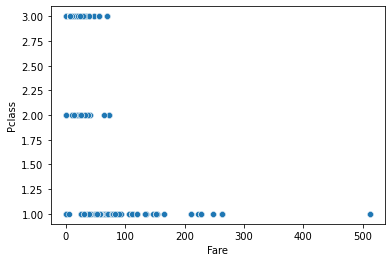

In [13]:
sns.scatterplot(data=df1, y='Pclass', x='Fare')

TWO WAY TABLE

In [30]:
# contingency table
pd.crosstab(index=df1['Sex'], columns=df1['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


STACKED COLUMN CHART

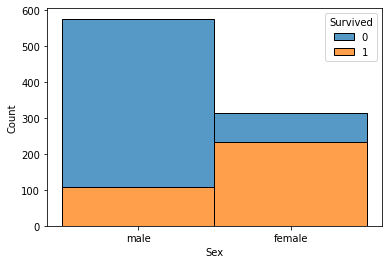

In [29]:
plot1 = sns.histplot(df1, x='Sex', hue='Survived', multiple='stack')

##### Chi-square test 

In [36]:
conn_table = pd.crosstab(index=df1['Sex'], columns=df1['Survived']) # contigency table
chi2_contingency(conn_table)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

##### Cramer-V correlation

In [37]:
# YET TO BE IMPLEMENTED

##### Z-Test

In [38]:
# YET TO BE IMPLEMENTED

##### Clustering

<AxesSubplot:xlabel='Age', ylabel='Fare'>

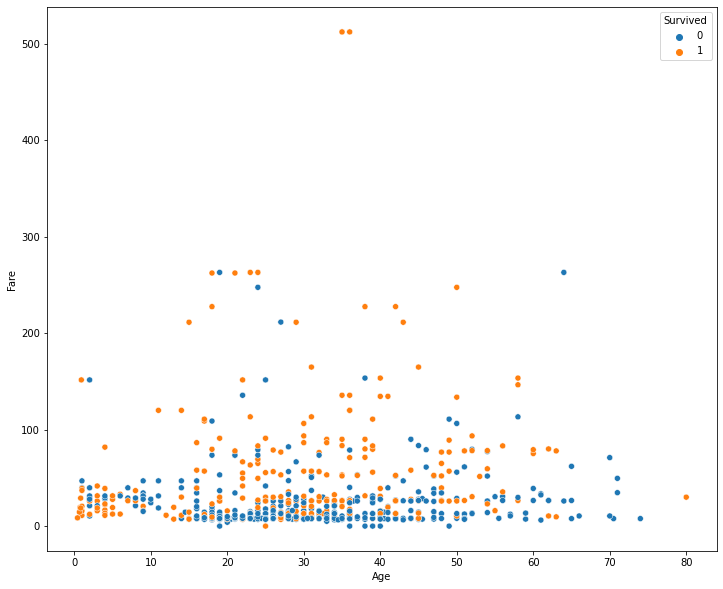

In [53]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(data=df1, x='Age', y='Fare', hue='Survived')

### Multivariate Analysis

In [54]:
# TODO